## Notebook E-tivity 2 CE4021 Linear Regression


Student name: Zheng Hanming


Student ID: 21225621


<hr style="border:2px solid gray"> </hr>


## Imports


In [20]:
import numpy as np
import matplotlib.pyplot as plt

If you believe required imports are missing, please contact your moderator.


<hr style="border:2px solid gray"> </hr>


## Reference Implementation


In [21]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [22]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)


In [23]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights


In [24]:
weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

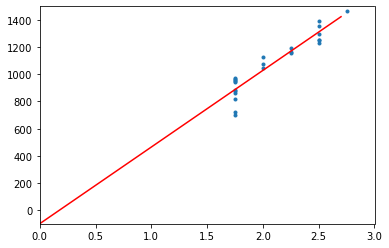

In [25]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>


## Task


You may add as many cells as you require to complete this task.


In [26]:
def test_fn(fn, expected, *args):
    """ Test if the return value of the fn equal to the expected value """
    print(f'- Testing Function : {fn.__name__}')
    print(f'  Input: {args}')
    result = None
    if args == None:
        result = fn()
    else:
        result = fn(*args)
    pass_or_failed = "Passed ✔️" if result == expected else "Failed ❌"
    print(f"  Test: {pass_or_failed}  => Expected: {expected} | Actual: {result}")
    print("")


## - This section contains code for validating arguments and raising errors if necessary.


In [27]:
def matrix1_col_count_equal_matrix2_row_count(matrix1, matrix2):
    _, v1_col_count = get_matrix_size(matrix1)
    v2_row_count, _ = get_matrix_size(matrix2)
    if v1_col_count != v2_row_count:
        raise InputError(
            'Matrix 1(column number) different from Matrix 2(row number)')


def validate_valid_matrix(matrix):
    validate_2D_number_matrix(matrix)
    validate_matrix_has_same_col_size_for_all_rows(matrix)


def validate_matrix_has_same_col_size_for_all_rows(matrix):
    """ Tests if the matrix is having the same column number for all rows """
    _, col_count = get_matrix_size(matrix)
    for row in matrix:
        if len(row) != col_count:
            raise InputError(
                'Matrix does not have same column number for all rows')


def validate_2D_number_matrix(matrix):
    """ Tests if the matrix is a 2D matrix of number """
    is_valid = True
    if not isinstance(matrix, (list, tuple, np.ndarray)):
        # if matrix is a not list or tuple: accept numpy array because X is np array
        is_valid = False
    for row in matrix:
        if not isinstance(row, (list, tuple, np.ndarray)):
            # if each row in the matrix is not a list or tuple: accept numpy array because X is np array
            is_valid = False
        for cell in row:
            if not isinstance(cell, (int, float)):
                # if each cell in the matrix is not a number
                is_valid = False
    if not is_valid:
        raise InputError('Matrix is not a 2D matrix of number')

def validate_2_by_2_matrix(matrix):
    row_num, col_num = get_matrix_size(matrix)
    if row_num != 2 and col_num != 2:
        raise InputError("Only 2 by 2 matrix is allow for this operation")

class InputError(Exception):
    pass


## - This section contains code for matrix manipulations


In [28]:
def transpose(matrix):
    """ transpose a matrix """
    validate_valid_matrix(matrix)

    result = []
    row_count, col_count = get_matrix_size(matrix)
    for i1 in range(col_count):
        result.append([])
        for i2 in range(row_count):
            result[i1].append(matrix[i2][i1])
    return result


def multiply_matrix(matrix1, matrix2):
    """ multiply two matrices """
    validate_valid_matrix(matrix1)
    validate_valid_matrix(matrix2)
    matrix1_col_count_equal_matrix2_row_count(matrix1, matrix2)

    v1_row_count, _ = get_matrix_size(matrix1)
    _, v2_col_count = get_matrix_size(matrix2)
    result = initialize_0_matrix(v1_row_count, v2_col_count)

    # fill matrix with values from matrix1 and matrix2
    row_count, col_count = get_matrix_size(result)
    for row in range(row_count):
        for col in range(col_count):
            v1_values = matrix1[row]
            v2_values = transpose(matrix2)[col]
            for l in range(len(v1_values)):
                result[row][col] += v1_values[l] * v2_values[l]
    return result


def multiply_scalar(matrix, scalar):
    """ multiple matrix with a scalar value """
    validate_valid_matrix(matrix)

    row_count, col_count = get_matrix_size(matrix)
    result = initialize_0_matrix(row_count, col_count)
    for row in range(row_count):
        for col in range(col_count):
            result[row][col] = matrix[row][col] * scalar
    return result


def inverse(matrix):
    """ inverse a 2x2 matrix """
    validate_valid_matrix(matrix)
    validate_2_by_2_matrix(matrix)

    a, b = matrix[0]
    c, d = matrix[1]

    divide_by = a*d-b*c

    if divide_by == 0:
        raise ZeroDivisionError("a*d-b*c amounts to 0 which cannot be divided")

    return multiply_scalar([[d, -b], [-c, a]], 1/divide_by)


def initialize_0_matrix(row, col):
    """ initialize matrix using row count and col count with 0 values """
    result = []
    for row_count in range(row):
        result.append([])
        for _ in range(col):
            result[row_count].append(0)
    return result


def get_matrix_size(matrix):
    row_count = len(matrix)
    col_count = len(matrix[0])
    return (row_count, col_count)


In [29]:
# Test : transpose
original_matrix1 = [[1, 2], [3, 4], [5, 6]]
transposed_matrix1 = [[1, 3, 5], [2, 4, 6]]
test_fn(transpose, transposed_matrix1, original_matrix1)

original_matrix2 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
transposed_matrix2 = [[1, 4, 7], [2, 5, 8], [3, 6, 9]]
test_fn(transpose, transposed_matrix2, original_matrix2)

original_matrix3 = [[1]]
transposed_matrix3 = [[1]]
test_fn(transpose, transposed_matrix3, original_matrix3)


- Testing Function : transpose
  Input: ([[1, 2], [3, 4], [5, 6]],)
  Test: Passed ✔️  => Expected: [[1, 3, 5], [2, 4, 6]] | Actual: [[1, 3, 5], [2, 4, 6]]

- Testing Function : transpose
  Input: ([[1, 2, 3], [4, 5, 6], [7, 8, 9]],)
  Test: Passed ✔️  => Expected: [[1, 4, 7], [2, 5, 8], [3, 6, 9]] | Actual: [[1, 4, 7], [2, 5, 8], [3, 6, 9]]

- Testing Function : transpose
  Input: ([[1]],)
  Test: Passed ✔️  => Expected: [[1]] | Actual: [[1]]



In [30]:
# Test : multiply_matrix
matrix1_1 = [[1, 2], [3, 4], [5, 6]]  # 3x2
matrix1_2 = [[2, 4], [6, 8]]  # 2x2
matrix_aft_multiplication1 = [[14, 20], [30, 44], [46, 68]]  # 3x2
test_fn(multiply_matrix, matrix_aft_multiplication1, matrix1_1, matrix1_2)

matrix2_1 = [[1, 2], [3, 4]]  # 2x2
matrix2_2 = [[1, 0], [0, 1]]  # 2x2
matrix_aft_multiplication2 = [[1, 2], [3, 4]]  # 2x2
test_fn(multiply_matrix, matrix_aft_multiplication2, matrix2_1, matrix2_2)

matrix3_1 = [[1, 2]]  # 1x2
matrix3_2 = [[2], [2]]  # 2x1
matrix_aft_multiplication3 = [[6]]  # 1x1
test_fn(multiply_matrix, matrix_aft_multiplication3, matrix3_1, matrix3_2)


- Testing Function : multiply_matrix
  Input: ([[1, 2], [3, 4], [5, 6]], [[2, 4], [6, 8]])
  Test: Passed ✔️  => Expected: [[14, 20], [30, 44], [46, 68]] | Actual: [[14, 20], [30, 44], [46, 68]]

- Testing Function : multiply_matrix
  Input: ([[1, 2], [3, 4]], [[1, 0], [0, 1]])
  Test: Passed ✔️  => Expected: [[1, 2], [3, 4]] | Actual: [[1, 2], [3, 4]]

- Testing Function : multiply_matrix
  Input: ([[1, 2]], [[2], [2]])
  Test: Passed ✔️  => Expected: [[6]] | Actual: [[6]]



In [31]:
# Test : multiply_scalar
matrix1 = [[1, 2, 3]]
scalar1 = 2
multiplied_matrix = [[2, 4, 6]]
test_fn(multiply_scalar, multiplied_matrix, matrix1, scalar1)

matrix2 = [[1, 2, 3], [4, 5, 6]]
scalar2 = 0.5
multiplied_matrix = [[0.5, 1, 1.5], [2, 2.5, 3]]
test_fn(multiply_scalar, multiplied_matrix, matrix2, scalar2)

- Testing Function : multiply_scalar
  Input: ([[1, 2, 3]], 2)
  Test: Passed ✔️  => Expected: [[2, 4, 6]] | Actual: [[2, 4, 6]]

- Testing Function : multiply_scalar
  Input: ([[1, 2, 3], [4, 5, 6]], 0.5)
  Test: Passed ✔️  => Expected: [[0.5, 1, 1.5], [2, 2.5, 3]] | Actual: [[0.5, 1.0, 1.5], [2.0, 2.5, 3.0]]



In [32]:
# Test : inverse
matrix1 = [[1, 2], [3, 4]]
inversed_matrix = [[-2.0, 1.0], [1.5, -0.5]]
test_fn(inverse, inversed_matrix, matrix1)

- Testing Function : inverse
  Input: ([[1, 2], [3, 4]],)
  Test: Passed ✔️  => Expected: [[-2.0, 1.0], [1.5, -0.5]] | Actual: [[-2.0, 1.0], [1.5, -0.5]]



In [33]:
# Test : initialize_0_matrix
row_num, col_num = 2, 2
zero_matrix = [[0, 0], [0, 0]]
test_fn(initialize_0_matrix, zero_matrix, row_num, col_num)

row_num, col_num = 4, 3
zero_matrix = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
test_fn(initialize_0_matrix, zero_matrix, row_num, col_num)


- Testing Function : initialize_0_matrix
  Input: (2, 2)
  Test: Passed ✔️  => Expected: [[0, 0], [0, 0]] | Actual: [[0, 0], [0, 0]]

- Testing Function : initialize_0_matrix
  Input: (4, 3)
  Test: Passed ✔️  => Expected: [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]] | Actual: [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]



In [34]:
# Test : get_matrix_size
matrix = [[1, 2], [3, 4]]
row_num, col_num = 2, 2
test_fn(get_matrix_size, (row_num, col_num), matrix)

matrix = [[1, 2], [3, 4], [3, 4], [3, 4], [3, 4], [3, 4]]
row_num, col_num = 6, 2
test_fn(get_matrix_size, (row_num, col_num), matrix)


- Testing Function : get_matrix_size
  Input: ([[1, 2], [3, 4]],)
  Test: Passed ✔️  => Expected: (2, 2) | Actual: (2, 2)

- Testing Function : get_matrix_size
  Input: ([[1, 2], [3, 4], [3, 4], [3, 4], [3, 4], [3, 4]],)
  Test: Passed ✔️  => Expected: (6, 2) | Actual: (6, 2)



## - This section contains code for actual linear regression related logic (Function Style)


In [35]:
def fit(X, y):
    """ 
        takes the data (X) and outputs (y) and returns the mean square error of the linear regression weight matrix 
        X is a matrix of bias and x value from sample
        y is a vecto of y from sample
    """
    weight = get_params(X, y)
    intercept = weight[0][0]
    multiplier = weight[1][0]

    raw_y_in_flat_list = [raw_y[0] for raw_y in y]
    predicted_y = [x[0]*intercept + x[1]*multiplier for x in X]

    return calc_mean_square_error(raw_y_in_flat_list, predicted_y)


def predict(X, y, new_X):
    """ 
        uses the weights found by the fit method and a number of data points X to create new predictions 
    """
    weight = get_params(X, y)
    intercept = weight[0][0]
    multiplier = weight[1][0]
    return [X[0]*intercept + X[1]*multiplier for X in new_X]


def get_params(X, y):
    """ 
        returns the weights found by the fit method 
    """
    return multiply_matrix(multiply_matrix(inverse(multiply_matrix(transpose(X), X)), transpose(X)), y)


def calc_mean_square_error(y, y_estimate):
    square_error = 0
    for i in range(len(y)):
        square_error += (y_estimate[i] - y[i])**2
    return square_error/len(y)


In [36]:
print('========== Fit ==========')
error = fit(X, y)
print(f'Square Error: {error}')

print("========== Get Param ==========")
my_weights = get_params(X, y)
print('My Weights', my_weights)
print('Numpy Weights', weights)

print("========== Predict ==========")
new_X = [[1, 0.5], [1, 0.75], [1, 1]]
predicted = predict(X, y, new_X)
print('New X', new_X)
print('Predicted y', predicted)


========== Fit ==========
Square Error: 5289.701729996911
========== Get Param ==========
My Weights [[-99.4643188137135], [564.2038924930501]]
Numpy Weights [[-99.46431881]
 [564.20389249]]
========== Predict ==========
New X [[1, 0.5], [1, 0.75], [1, 1]]
Predicted y [182.63762743281157, 323.6886005560741, 464.7395736793367]


<hr style="border:2px solid gray"> </hr>


## Reflection


Things learnt from forum discussions:
1. Added validatons to validate function arguments like is matrix of int/float or are the matrices of correct sizes.
2. Inspired by teammate to add a function to get matrix size: row and column count.

With above matrix manipulation helper methods the linear regression logic has been encapsulated into a class. The main benefit of this is\
to allow the class instance to keep a record of the trained weight which can be reused as many times as possible.


## - This section contains code for actual linear regression related logic (Class Style)


In [37]:
class LinearRegressionModel():
    __error_msg = "Model not trained. Please train the model by calling fit method first."
    __weight = None

    def fit(self, X, y):
        """ 
            takes the data (X) and outputs (y) and returns the mean square error of the linear regression weight matrix 
            X is a matrix of bias and x value from sample
            y is a vecto of y from sample
        """
        self.__weight = multiply_matrix(multiply_matrix(inverse(multiply_matrix(transpose(X), X)), transpose(X)), y)
        intercept = self.__weight[0][0]
        multiplier = self.__weight[1][0]

        raw_y_in_flat_list = [raw_y[0] for raw_y in y]
        predicted_y = [x[0]*intercept + x[1]*multiplier for x in X]

        return calc_mean_square_error(raw_y_in_flat_list, predicted_y)

    def predict(self, new_X):
        """ 
            uses the weights found by the fit method and a number of data points X to create new predictions 
        """
        if self.__weight == None:
            print(self.__error_msg)
            return None
        intercept = self.__weight[0][0]
        multiplier = self.__weight[1][0]
        return [X[0]*intercept + X[1]*multiplier for X in new_X]

    def get_params(self):
        """ 
            returns the weights found by the fit method 
        """
        if self.__weight == None:
            print(self.__error_msg)
            return None

        return self.__weight


In [38]:
model = LinearRegressionModel()
print('========== Fit (Class) ==========')
error = model.fit(X, y)
print(f'Square Error: {error}')

print("========== Get Param (Class) ==========")
my_weights = model.get_params()
print('My Weights', my_weights)
print('Numpy Weights', weights)

print("========== Predict (Class) ==========")
new_X = [[1, 0.5], [1, 0.75], [1, 1]]
predicted = model.predict(new_X)
print('New X', new_X)
print('Predicted y', predicted)


========== Fit (Class) ==========
Square Error: 5289.701729996911
========== Get Param (Class) ==========
My Weights [[-99.4643188137135], [564.2038924930501]]
Numpy Weights [[-99.46431881]
 [564.20389249]]
========== Predict (Class) ==========
New X [[1, 0.5], [1, 0.75], [1, 1]]
Predicted y [182.63762743281157, 323.6886005560741, 464.7395736793367]
